# Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Leitura dos dados


In [ ]:
df_ofertas = pd.read_csv('ofertas_relampago.csv')

# Criação de colunas relevantes para a análise

In [ ]:
df_ofertas['REMAINING_STOCK_PERCENTAGE'] = df_ofertas['REMAINING_STOCK_AFTER_END']/df_ofertas['INVOLVED_STOCK']

In [ ]:
df_ofertas['UNIT_VALUE'] = df_ofertas['SOLD_AMOUNT']/df_ofertas['SOLD_QUANTITY']

In [ ]:
df_ofertas

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,REMAINING_STOCK_PERCENTAGE,UNIT_VALUE
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,-0.500000,0.786667
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,1.000000,NaN
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS,0.800000,3.576667
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,0.866667,3.515000
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES,0.000000,2.643333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,0.600000,2.713333
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,1.000000,NaN
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,0.600000,8.310000
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,0.200000,9.697500


# Contextualização

Em uma análise desse tipo, podemos ter alguns tipos de interesse. Entre eles:

- análise macro para micro: fazer uma análise temporal e identificar dentro das datas, os agrupamentos de produtos, produtos, sub-produtos quais tiveram o pior e melhor desempenho.

- análise micro: identificar um produto com melhor/pior desempenho e destrinchar temporalmente o que pode ter gerado tal resultado.

## Medidas descritivas básicas

Fazendo uma leitura rápida, podemos notar que possuímos 61 dias de análise nessa base de dados, 1266 produtos agrupados em 36 categorias.

In [106]:
df_ofertas['OFFER_START_DATE'].value_counts()

2021-07-30    1300
2021-07-29    1299
2021-07-08    1267
2021-07-31    1228
2021-07-28    1214
              ... 
2021-06-07     426
2021-06-06     412
2021-06-09     366
2021-06-08     317
2021-06-30     254
Name: OFFER_START_DATE, Length: 61, dtype: int64

In [115]:
  df_ofertas['DOMAIN_ID'].value_counts()

MLM-SURGICAL_AND_INDUSTRIAL_MASKS            1759
MLM-HEADPHONES                                761
MLM-LED_STRIPS                                518
MLM-SUNGLASSES                                472
MLM-VEHICLE_LED_BULBS                         454
                                             ... 
MLM-INSECT_KILLER_LIGHTS                        1
MLM-WATERING_CANS                               1
MLM-BASEBALL_AND_SOFTBALL_FIELDING_GLOVES       1
MLM-HABERDASHERY_BEADS                          1
MLM-ELECTRIC_SANDWICH_MAKERS                    1
Name: DOMAIN_ID, Length: 1266, dtype: int64

In [114]:
  df_ofertas['DOM_DOMAIN_AGG1'].value_counts()[0:36]

HOME&DECOR                      6742
APPAREL ACCESORIES              4387
APPAREL                         3856
COMPUTERS                       3770
SPORTS                          3289
PHARMACEUTICS                   3035
ELECTRONICS                     3018
PERSONAL CARE                   3016
MOBILE                          1841
AUTOPARTS                       1696
FOOTWEAR                        1516
TOOLS AND CONSTRUCTION          1491
TOYS AND GAMES                  1426
STATIONARY                      1259
INDUSTRY                        1199
BEAUTY EQUIPMENT                1099
FOODS                            858
PERSONAL HYGIENE                 840
BABY                             801
MOTOPARTS                        641
BOOKS, MULTIMEDIA & OTHER E!     498
PETS FOOD                        487
PARTY                            397
CLEANING                         360
SECURITY                         320
PET PRODUCTS                     257
SUPLEMENTS                       193
B

O estoque remascente relativo pode ser considerado um indicador de sucesso da oferta, já que ter produtos estocados por muito tempo, pode aumentar custos referentes aos centro de distribuições e até mesmo estragar, avariar produtos ou até sair de moda/coleção.

Em cerca de 55% dos produtos, foram oferecidos frete grátis. No entanto, os produtos em que foram oferecidos frete grátis não tiveram menor estoque remanescente, como poderia ser esperado.

In [120]:
df_ofertas['SHIPPING_PAYMENT_TYPE'].value_counts(normalize=True)

free_shipping    0.546876
none             0.453124
Name: SHIPPING_PAYMENT_TYPE, dtype: float64

<Axes: xlabel='SHIPPING_PAYMENT_TYPE', ylabel='REMAINING_STOCK_PERCENTAGE'>

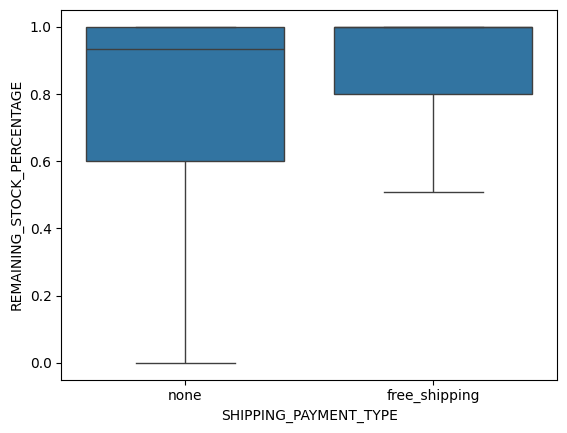

In [126]:
sns.boxplot(data=df_ofertas, x="SHIPPING_PAYMENT_TYPE", y="REMAINING_STOCK_PERCENTAGE",showfliers=False)

# Análise temporal


Em geral, podemos observar um percentual bem alto de estoque remanescente, o que pode indicar que existe oportunidade de melhora em relação ao planejamento das ofertas.

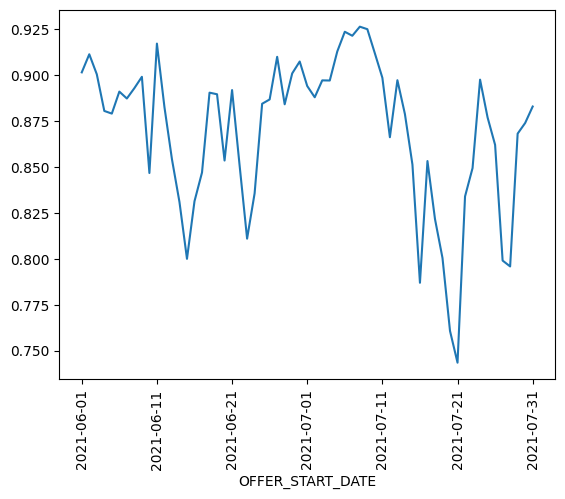

In [21]:
(df_ofertas.groupby('OFFER_START_DATE')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.
 groupby('OFFER_START_DATE')['INVOLVED_STOCK'].sum()).plot()

plt.xticks(rotation=90)
plt.show()


Em relação ao valor unitário de cada produto, observamos uma mediana próxima de 4 reais.

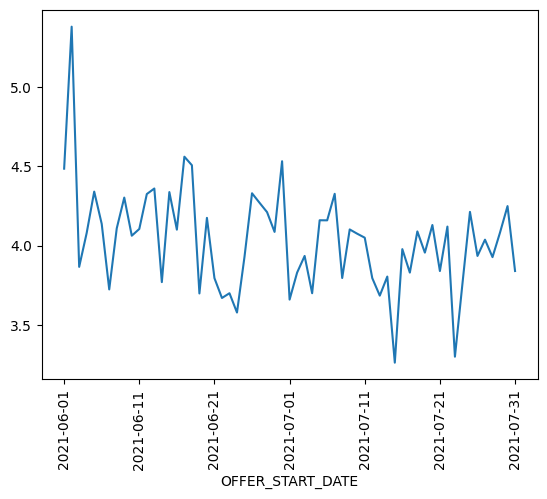

In [72]:
df_ofertas.groupby('OFFER_START_DATE')['UNIT_VALUE'].median().plot()
plt.xticks(rotation=90)
plt.show()

### Datas com melhores desempenhos

Abaixo, podemos observar as datas com menor estoque relativo remanescente, o que nos evidencializa as datas com melhores performances de campanha.

In [24]:
(df_ofertas.groupby('OFFER_START_DATE')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.
 groupby('OFFER_START_DATE')['INVOLVED_STOCK'].sum()).sort_values()[0:10]


OFFER_START_DATE
2021-07-21    0.743564
2021-07-20    0.760835
2021-07-16    0.787033
2021-07-28    0.795924
2021-07-27    0.799111
2021-06-15    0.800058
2021-07-19    0.800499
2021-06-23    0.811034
2021-07-18    0.821728
2021-06-14    0.830971
dtype: float64

Uma dúvida natural, seria investigar a relação entre a quantidade de estoque remanescente com o preço unitário dos itens. Ou seja, será que dias em que temos produtos mais baratos sendo vendidos, temos também uma diminuição de estoque remanescente. Ao fazer essa investigação, vemos que a correlação entre essas duas variáveis é baixa (0.19), refutando essa hipótese, pelo menos de maneira ampla. Ainda pode ser que isso seja verdade em um zoom de um único produto.

In [79]:
np.corrcoef((df_ofertas.groupby('OFFER_START_DATE')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.
 groupby('OFFER_START_DATE')['INVOLVED_STOCK'].sum()), (df_ofertas.groupby('OFFER_START_DATE')['UNIT_VALUE'].median()))

array([[1.        , 0.19532955],
       [0.19532955, 1.        ]])

Outra hipótese que podemos investigar é se existe relação entre o frete grátis e o estoque remascente relativo. Porém, a correlação entre o % de produtos com frete grátis e o % de estoque remanescente também é baixa, refutando essa hipótese.

In [91]:
np.corrcoef((df_ofertas.groupby('OFFER_START_DATE')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.
 groupby('OFFER_START_DATE')['INVOLVED_STOCK'].sum()), df_ofertas[df_ofertas['SHIPPING_PAYMENT_TYPE'] =='free_shipping'].groupby('OFFER_START_DATE')['SHIPPING_PAYMENT_TYPE'].count()/df_ofertas.groupby('OFFER_START_DATE')['SHIPPING_PAYMENT_TYPE'].count())

array([[1.        , 0.11213633],
       [0.11213633, 1.        ]])

#### Análise nível agrupamento

Dentro da data de melhor desempenho (2021-07-21), podemos observar as categorias de produtos melhores sucedidas. Inclusive, dentro do critério de menor estoque remanescente relativo, obervamos que suplementos foi 100% bem sucedido já que todo o estoque foi vendido na oferta da data.

In [35]:
(df_ofertas[df_ofertas['OFFER_START_DATE']=='2021-07-21'].groupby('DOM_DOMAIN_AGG1')['REMAINING_STOCK_AFTER_END'
].sum()/df_ofertas[df_ofertas['OFFER_START_DATE']=='2021-07-21'].groupby('DOM_DOMAIN_AGG1')['INVOLVED_STOCK'].sum(
    )).sort_values() [0:10]



DOM_DOMAIN_AGG1
SUPLEMENTS          0.000000
WHEELS & TIRES      0.400000
AUTOPARTS           0.624096
INDUSTRY            0.633333
PHARMACEUTICS       0.681265
BEAUTY EQUIPMENT    0.701799
SPORTS              0.713287
PERSONAL HYGIENE    0.720000
COMPUTERS           0.766497
PERSONAL CARE       0.778351
dtype: float64

##### Análise nível produto

Descendo ainda mais um nível, dentro da data de melhor desempenho (2021-07-21) e dentro da categoria de melhor desempenho (SUPLEMENTS), podemos observar um único produto, o qual evidentemente também foi 100% bem sucedido.

In [42]:
(df_ofertas[(df_ofertas['OFFER_START_DATE']=='2021-07-21') & (df_ofertas['DOM_DOMAIN_AGG1']=='SUPLEMENTS')].groupby('DOMAIN_ID')['REMAINING_STOCK_AFTER_END'
].sum()/df_ofertas[(df_ofertas['OFFER_START_DATE']=='2021-07-21')& (df_ofertas['DOM_DOMAIN_AGG1']=='SUPLEMENTS')].groupby('DOMAIN_ID')['INVOLVED_STOCK'].sum(
    ))



DOMAIN_ID
MLM-SUPPLEMENTS    0.0
dtype: float64

## Datas com piores desempenhos

Em contrapartida, podemos observar as datas com maior estoque relativo remanescente, o que nos evidencializa as datas com piores performances de campanha.

In [26]:
(df_ofertas.groupby('OFFER_START_DATE')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.
 groupby('OFFER_START_DATE')['INVOLVED_STOCK'].sum()).sort_values(ascending=False)[0:10]


OFFER_START_DATE
2021-07-08    0.926366
2021-07-09    0.924997
2021-07-06    0.923602
2021-07-07    0.921423
2021-06-11    0.917159
2021-07-05    0.912888
2021-07-10    0.911871
2021-06-02    0.911348
2021-06-27    0.909960
2021-06-30    0.907415
dtype: float64

### Análise nível agrupamento


  Filtrando a data de pior desempenho, podemos observar que as categorias de pneus, limpeza e comida pet tiveram a pior performance não vendendo nenhum produto nessa data.

In [45]:
(df_ofertas[df_ofertas['OFFER_START_DATE']=='2021-07-08'].groupby('DOM_DOMAIN_AGG1')['REMAINING_STOCK_AFTER_END'
].sum()/df_ofertas[df_ofertas['OFFER_START_DATE']=='2021-07-08'].groupby('DOM_DOMAIN_AGG1')['INVOLVED_STOCK'].sum(
    )).sort_values(ascending= False) [0:10]



DOM_DOMAIN_AGG1
WHEELS & TIRES            1.000000
CLEANING                  1.000000
PETS FOOD                 1.000000
TOYS AND GAMES            0.994487
FOOTWEAR                  0.970711
SPORTS                    0.951416
PERSONAL HYGIENE          0.949527
SECURITY                  0.948276
HOME&DECOR                0.948095
TOOLS AND CONSTRUCTION    0.944882
dtype: float64

### Análise nível produto

Pegando como exemplo, a categoria de pneus, observamos novamente um único produto e claramente com nenhuma venda.

In [46]:
(df_ofertas[(df_ofertas['OFFER_START_DATE']=='2021-07-08') & (df_ofertas['DOM_DOMAIN_AGG1']=='WHEELS & TIRES')].groupby('DOMAIN_ID')['REMAINING_STOCK_AFTER_END'
].sum()/df_ofertas[(df_ofertas['OFFER_START_DATE']=='2021-07-08')& (df_ofertas['DOM_DOMAIN_AGG1']=='WHEELS & TIRES')].groupby('DOMAIN_ID')['INVOLVED_STOCK'].sum(
    ))



DOMAIN_ID
MLM-AUTOMOTIVE_TIRES    1.0
dtype: float64

# Análise segmentada por produtos

## melhores desempenhos

Abaixo, podemos observar os produtos com menor estoque relativo remanescente, o que nos evidencializa as melhores performances de campanha.

Aqui podemos identificar um problema, já que alguns produtos venderam em maior quantidade do que estava fisicamente disponível em estoque.



In [94]:
(df_ofertas.groupby(['DOMAIN_ID',])['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.groupby(['DOMAIN_ID',])['INVOLVED_STOCK'].sum(

)).sort_values() [0:20]



DOMAIN_ID
MLM-NASAL_CPAP_MASKS                     -2.000000
MLM-BLEACHES                             -0.666667
MLM-CAMERA_STRAPS                        -0.600000
MLM-KITCHEN_POTHOLDERS_AND_OVEN_MITTS    -0.600000
MLM-KITCHEN_PAPER_TOWELS                 -0.400000
MLM-TEA_INFUSERS                         -0.400000
MLM-ESOTERIC_PENDULUMS                   -0.200000
MLM-LAUNDRY_BAR_SOAPS                    -0.118182
MLM-LINEMAN_PLIERS                        0.000000
MLM-INSECT_KILLER_LIGHTS                  0.000000
MLM-MOTORCYCLE_FENDER_SUPPORT_BRACKETS    0.000000
MLM-STYLUSES                              0.000000
MLM-LASER_POINTERS                        0.000000
MLM-BASKET_BALLS                          0.000000
MLM-WASHING_AND_DRYER_MACHINE_COVERS      0.000000
MLM-BONGS                                 0.000000
MLM-COMBS                                 0.000000
MLM-BICYCLE_SEAT_COVERS                   0.000000
MLM-SHAKER_BOTTLES                        0.000000
MLM-LOCK_PICKS       

Poderiamos tentar identificar se houve alguma mudança de estratégia como queda de preço ou mesmo o oferecimento de frete grátis que provocou esse desempenho, porém o produto foi ofertado apenas uma vez, não sendo possível investigar o que teria acontecido em outro cenário.

In [97]:
df_ofertas[df_ofertas['DOMAIN_ID'] == 'MLM-LINEMAN_PLIERS'].sort_values(by=
                                                                  'OFFER_START_DATE')


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,REMAINING_STOCK_PERCENTAGE,UNIT_VALUE
34937,2021-06-08,2021-06-08 13:00:00+00:00,2021-06-08 18:05:26+00:00,lightning_deal,15,0,25.7,15.0,NaN,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-LINEMAN_PLIERS,0.0,1.713333


## Piores desempenhos

Em contrapartida, podemos observar os produtos com maior estoque relativo remanescente, o que nos evidencializa a princípio piores performances de campanha.

In [99]:
(df_ofertas.groupby('DOMAIN_ID')['REMAINING_STOCK_AFTER_END'].sum()/df_ofertas.groupby('DOMAIN_ID')['INVOLVED_STOCK'].sum(

)).sort_values(ascending=False) [0:10]



DOMAIN_ID
MLM-3D_PENS                      1.0
MLM-LEARNING_MAZES               1.0
MLM-CHRISTMAS_TREE_ORNAMENTS     1.0
MLM-KITCHEN_WINE_VACUUM_PUMPS    1.0
MLM-CHOPSTICKS                   1.0
MLM-CHOCOLATE_WATERFALLS         1.0
MLM-LADDERS                      1.0
MLM-LAMP_HOLDERS                 1.0
MLM-LAPTOP_KEYBOARDS             1.0
MLM-LAPTOP_SKINS                 1.0
dtype: float64

Porém, quando observamos no detalhe o que houve com esse produto específico, notamos que a oferta ficou disponível apenas 32 segundos, o que pode significar uma falha sistêmica.

In [100]:
df_ofertas[df_ofertas['DOMAIN_ID'] == 'MLM-3D_PENS'].sort_values(by=
                                                                  'OFFER_START_DATE')


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,REMAINING_STOCK_PERCENTAGE,UNIT_VALUE
39898,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 07:00:32+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-3D_PENS,1.0,NaN


In [104]:
df_ofertas[df_ofertas['DOMAIN_ID'] == 'MLM-LAPTOP_SKINS'].sort_values(by=
                                                                  'OFFER_START_DATE')


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,REMAINING_STOCK_PERCENTAGE,UNIT_VALUE
9089,2021-06-06,2021-06-06 07:00:00+00:00,2021-06-06 13:00:04+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,COMPUTERS,CE,MLM-LAPTOP_SKINS,1.0,NaN


## Dando zoom em um produto específico

Podemos observar, ainda, filtrando um produto específico (comida de pássaro) que na data 22/06 o preço unitário atingiu seu mínimo e o estoque remanescente também foi o menor observado.

In [105]:
df_ofertas[df_ofertas['DOMAIN_ID'] == 'MLM-BIRD_FOODS'].sort_values(by=
                                                                  'OFFER_START_DATE')


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,REMAINING_STOCK_PERCENTAGE,UNIT_VALUE
39622,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-01 19:00:00+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,PETS FOOD,CPG,MLM-BIRD_FOODS,1.000000,NaN
26193,2021-06-17,2021-06-17 16:00:00+00:00,2021-06-18 00:01:20+00:00,lightning_deal,7,7,NaN,NaN,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,1.000000,NaN
48091,2021-06-19,2021-06-19 14:00:00+00:00,2021-06-19 22:00:00+00:00,lightning_deal,7,1,4.78,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0.142857,0.796667
24808,2021-06-20,2021-06-20 15:00:00+00:00,2021-06-20 23:00:00+00:00,lightning_deal,8,4,3.18,4.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0.500000,0.795000
33956,2021-06-21,2021-06-21 13:00:00+00:00,2021-06-21 21:00:00+00:00,lightning_deal,4,4,NaN,NaN,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,1.000000,NaN
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,-0.500000,0.786667
